<a href="https://colab.research.google.com/github/Letch49/ML-vvsu-2025/blob/feature/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# МЛ Практика 2: Статистика в действии и её влияние на модель

## **Цель занятия:**
Изучить, как статистические метрики (среднее, медиана, квантили, размер выборки, стандартное отклонение) влияют на анализ данных и построение моделей машинного обучения. На практике мы проведем анализ целевой переменной **Y**, обучим модель линейной регрессии и исследуем влияние статистических характеристик на метрики модели.

## **Задание состоит из следующих частей:**
1. Анализ целевой переменной **Y** с точки зрения статистики. (в нашем случае - бинарная классификация)
2. Анализ пропусков
2. Изучение влияния статистических метрик на данные.
3. Обучение модели линейной регрессии и оценка ее точности.
4. Проведение теста Пирсона.
5. Визуализация результатов и анализ влияния статистики на метрики модели.
6. Валидация модели
---

<pre>AGE_50 – Возраст человека.
MD_50 – Медицинский диагноз или индекс здоровья.
SBP_50 – Систолическое артериальное давление (systolic blood pressure) .
DBP_50 – Диастолическое артериальное давление (diastolic blood pressure).
HT_50 – Рост (height).
WT_50 – Вес (weight).
CHOL_50 – Уровень холестерина (cholesterol).
SES – Социально-экономический статус (socioeconomic status).
CL_STATUS – Клинический статус (возможно, индикатор состояния здоровья или наличия хронических заболеваний).
MD_62 – Медицинский диагноз или индекс здоровья.
SBP_62 – Систолическое артериальное давление.
DBP_62 – Диастолическое артериальное давление.
CHOL_62 – Уровень холестерина.
WT_62 – Вес.
IHD_DX – Диагноз ишемической болезни сердца (ischemic heart disease diagnosis).
DEATH – Индикатор смерти (возможно, "1" означает смерть, "0" — нет).</pre>

## 1. Анализ целевой переменной Y с точки зрения статистики

### **Описание:**
В этом разделе вы проведете статистический анализ целевой переменной **Y**, изучите ее распределение и основные статистические характеристики.

1. **Импортируйте необходимые библиотеки:**

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

2. **Загружаем набор данных:**

In [99]:
# Загрузка набора данных
df = pd.read_csv('heart.csv')

In [100]:
df

,AGE_50,MD_50,SBP_50,DBP_50,HT_50,WT_50,CHOL_50,SES,CL_STATUS,MD_62,SBP_62,DBP_62,CHOL_62,WT_62,IHD_DX,DEATH
0,42,1,110,65,64,147,291,2,8,4,120,78,271,146,2,1
1,53,1,130,72,69,167,278,1,6,2,122,68,250,165,9,1
2,53,2,120,90,70,222,342,4,8,1,132,90,304,223,2,1
3,48,4,120,80,72,229,239,4,8,2,118,68,209,227,3,1
4,53,3,118,74,66,134,243,3,8,5,118,56,261,138,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,50,1,115,80,66,148,300,2,8,1,115,65,273,152,0,0
196,23,1,110,70,69,137,120,3,8,2,112,76,198,153,0,0
197,20,3,130,80,66,150,210,5,0,1,130,85,274,158,0,0
198,46,3,140,84,66,138,130,4,6,2,148,88,160,157,0,0


In [101]:
# для удобства распечатаем все колонки
for column in df.columns:
  print(f'колонка: {column}')

колонка: AGE_50
колонка: MD_50
колонка: SBP_50
колонка: DBP_50
колонка: HT_50
колонка: WT_50
колонка: CHOL_50
колонка: SES
колонка: CL_STATUS
колонка: MD_62
колонка: SBP_62
колонка: DBP_62
колонка: CHOL_62
колонка: WT_62
колонка: IHD_DX
колонка: DEATH


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   AGE_50     200 non-null    int64
 1   MD_50      200 non-null    int64
 2   SBP_50     200 non-null    int64
 3   DBP_50     200 non-null    int64
 4   HT_50      200 non-null    int64
 5   WT_50      200 non-null    int64
 6   CHOL_50    200 non-null    int64
 7   SES        200 non-null    int64
 8   CL_STATUS  200 non-null    int64
 9   MD_62      200 non-null    int64
 10  SBP_62     200 non-null    int64
 11  DBP_62     200 non-null    int64
 12  CHOL_62    200 non-null    int64
 13  WT_62      200 non-null    int64
 14  IHD_DX     200 non-null    int64
 15  DEATH      200 non-null    int64
dtypes: int64(16)
memory usage: 25.1 KB


3. **Проверьте наличие пропущенных значений и работа с пропусками для числовых:**

In [103]:
# Проверка на пропущенные значения
print(df.isnull().sum()) # пропусков нет

AGE_50       0
MD_50        0
SBP_50       0
DBP_50       0
HT_50        0
WT_50        0
CHOL_50      0
SES          0
CL_STATUS    0
MD_62        0
SBP_62       0
DBP_62       0
CHOL_62      0
WT_62        0
IHD_DX       0
DEATH        0
dtype: int64


In [104]:
# генерируем случайную последовательность
np.random.seed(42)
df_test_nan = df.copy()
df_test_nan.loc[np.random.choice(df_test_nan.index, size=5, replace=True), 'WT_50'] = np.nan

In [105]:
# Проверка на пропущенные значения
print(df_test_nan.isnull().sum()) # пропусков нет

AGE_50       0
MD_50        0
SBP_50       0
DBP_50       0
HT_50        0
WT_50        5
CHOL_50      0
SES          0
CL_STATUS    0
MD_62        0
SBP_62       0
DBP_62       0
CHOL_62      0
WT_62        0
IHD_DX       0
DEATH        0
dtype: int64


In [106]:
# Вариант 2: Заполнение пропусков медианой
df_median = df_test_nan.copy()
df_median.WT_50 = df_median.WT_50.fillna(df_median.WT_50.median())

print("\n# Заполнение пропусков медианой")
print(df_median.isnull().sum()) # пропусков нет


# Заполнение пропусков медианой
AGE_50       0
MD_50        0
SBP_50       0
DBP_50       0
HT_50        0
WT_50        0
CHOL_50      0
SES          0
CL_STATUS    0
MD_62        0
SBP_62       0
DBP_62       0
CHOL_62      0
WT_62        0
IHD_DX       0
DEATH        0
dtype: int64


In [107]:
# df_test_nan.category_variable.mode()
# print(df_median.isnull().sum())

⏰ Заполнение категориальных признаков происходит с помощью ```df.category_variable.mode() (как один из вариантов, хотя и считается недостаточно хорошим).```

Как вариант - можно использовать KNN (K-ближайших соедей)

In [108]:
df_category = df_test_nan.copy()
df_category.DEATH = df_category.DEATH.fillna(df.DEATH.median())
print("\n Заполнение пропусков средним")
print(df_category.isnull().sum())


 Заполнение пропусков средним
AGE_50       0
MD_50        0
SBP_50       0
DBP_50       0
HT_50        0
WT_50        5
CHOL_50      0
SES          0
CL_STATUS    0
MD_62        0
SBP_62       0
DBP_62       0
CHOL_62      0
WT_62        0
IHD_DX       0
DEATH        0
dtype: int64


4. **Выбираем целвую переменную**

⏰ В качестве целевой выбираем категориальную переменную, либо превращаем числовую в категориальное

```Была выбрана целевая переменная 'risk_group'-> которая была преобразована из IHD_DX (если индекс >= 5, то вино человек находится в группе риска, иначе нет)```

In [109]:
df['risk_group'] = np.where(df['IHD_DX'] <= 5, 1, 0).astype(int)

In [110]:
df.columns

Index(['AGE_50', 'MD_50', 'SBP_50', 'DBP_50', 'HT_50', 'WT_50', 'CHOL_50',
       'SES', 'CL_STATUS', 'MD_62', 'SBP_62', 'DBP_62', 'CHOL_62', 'WT_62',
       'IHD_DX', 'DEATH', 'risk_group'],
      dtype='object')

In [111]:
Y = df['risk_group'] # выбираем целевую переменную (категориальную)
X = df.drop('risk_group', axis=1) # переменные для проверки влияния

# В моем случае я дропаю базовую переменную, а не только. Y
X = X.drop('IHD_DX', axis=1)

5. **Графический анализ**

In [112]:
# Список числовых колонок для построения графиков
numeric_cols = X.select_dtypes(include=['float64', 'int64'])
numeric_cols

,AGE_50,MD_50,SBP_50,DBP_50,HT_50,WT_50,CHOL_50,SES,CL_STATUS,MD_62,SBP_62,DBP_62,CHOL_62,WT_62,DEATH
0,42,1,110,65,64,147,291,2,8,4,120,78,271,146,1
1,53,1,130,72,69,167,278,1,6,2,122,68,250,165,1
2,53,2,120,90,70,222,342,4,8,1,132,90,304,223,1
3,48,4,120,80,72,229,239,4,8,2,118,68,209,227,1
4,53,3,118,74,66,134,243,3,8,5,118,56,261,138,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,50,1,115,80,66,148,300,2,8,1,115,65,273,152,0
196,23,1,110,70,69,137,120,3,8,2,112,76,198,153,0
197,20,3,130,80,66,150,210,5,0,1,130,85,274,158,0
198,46,3,140,84,66,138,130,4,6,2,148,88,160,157,0


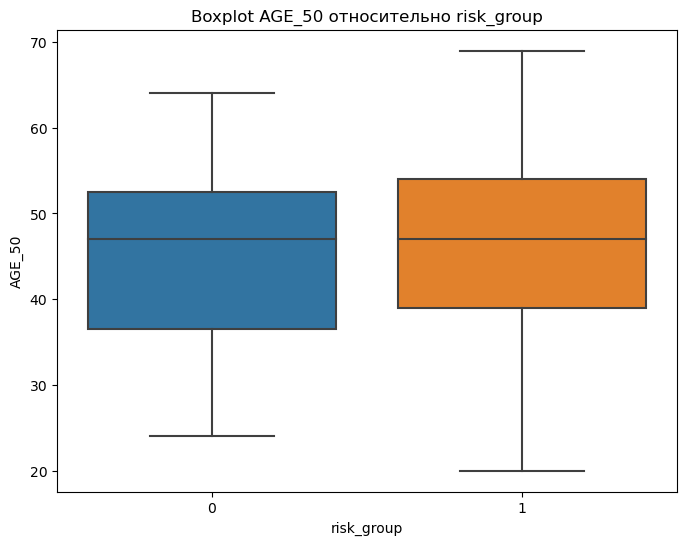

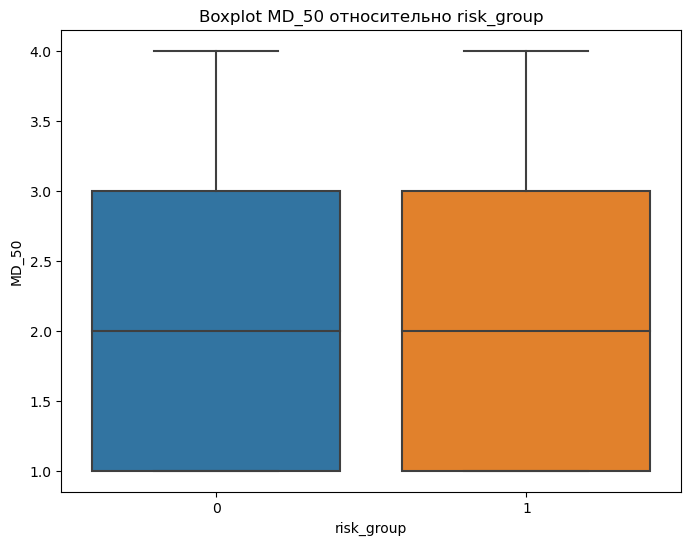

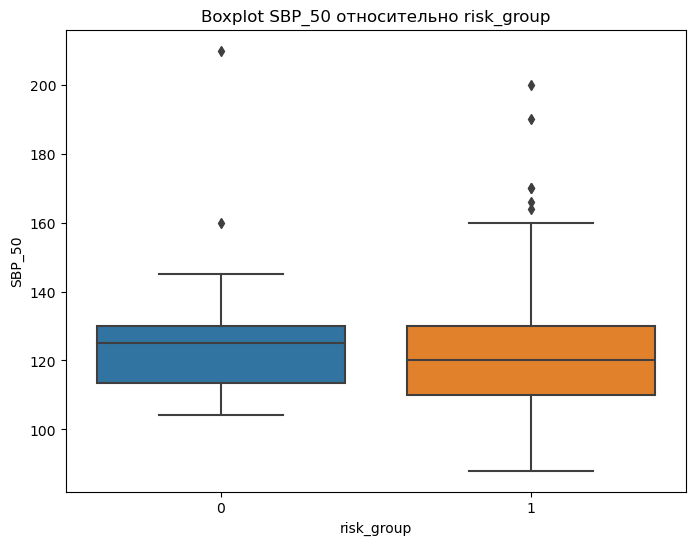

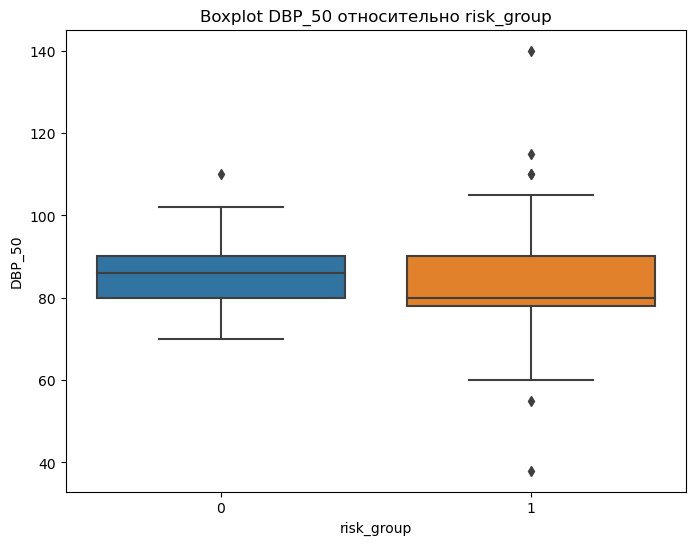

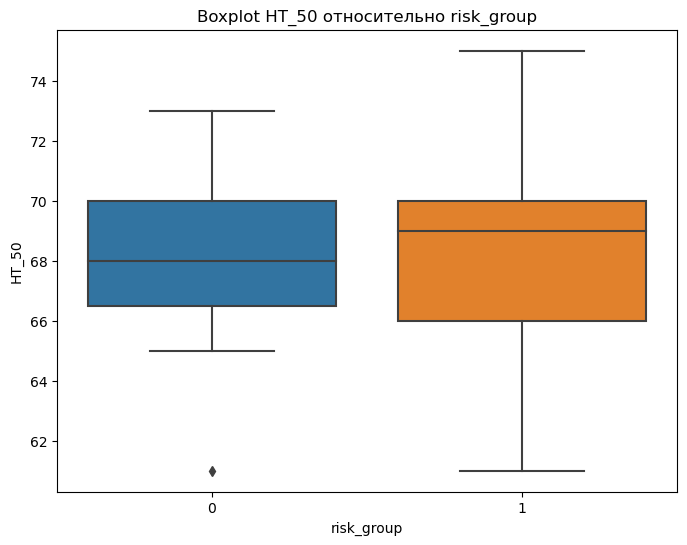

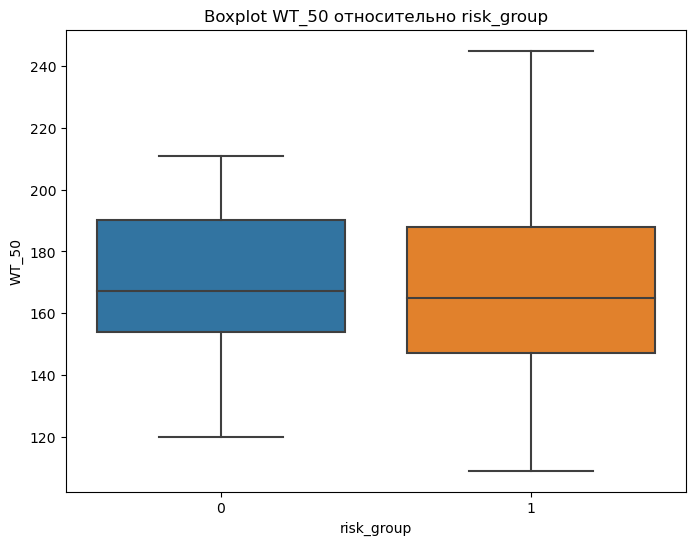

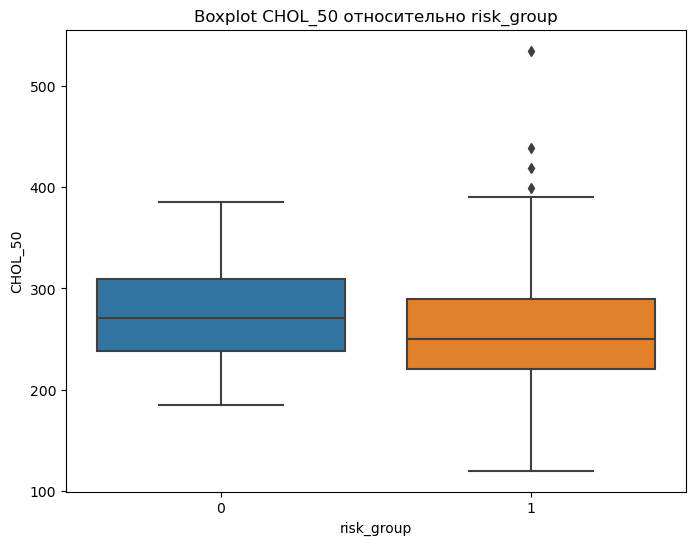

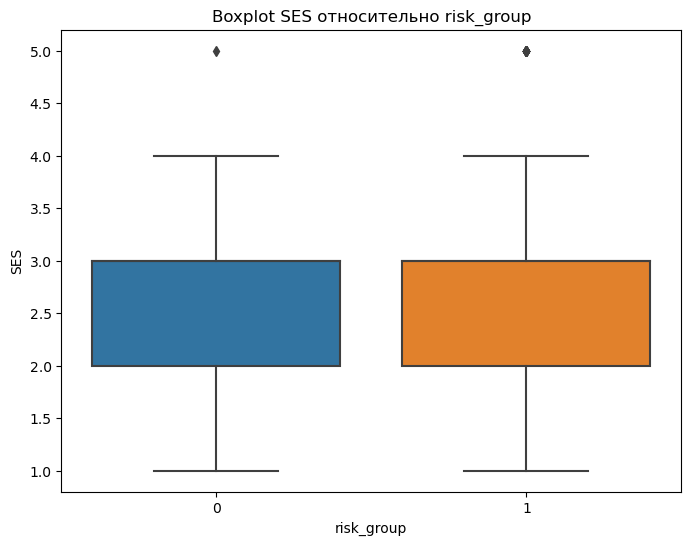

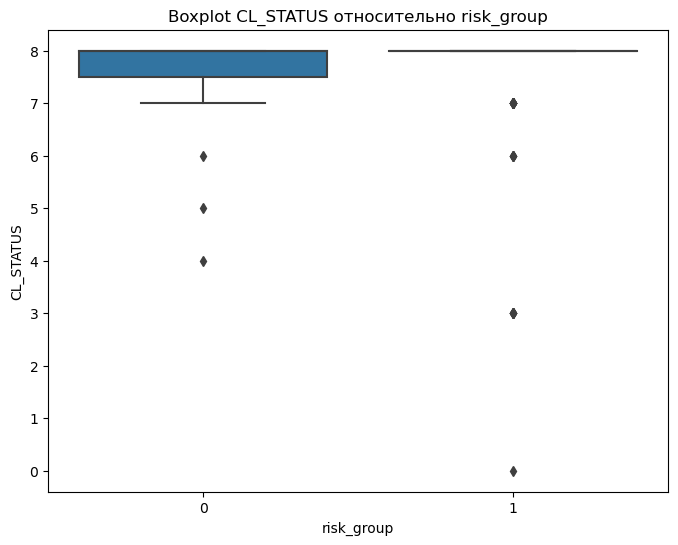

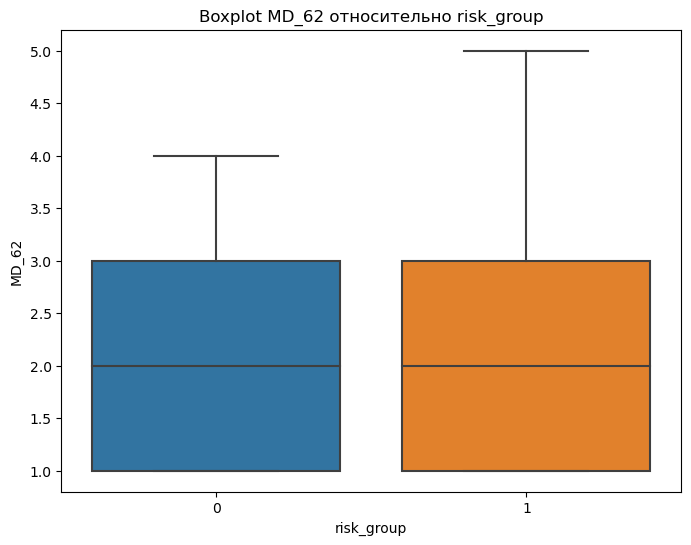

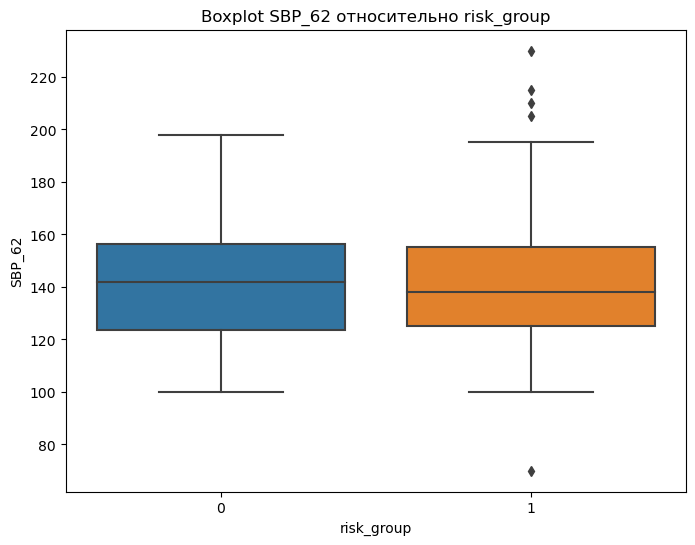

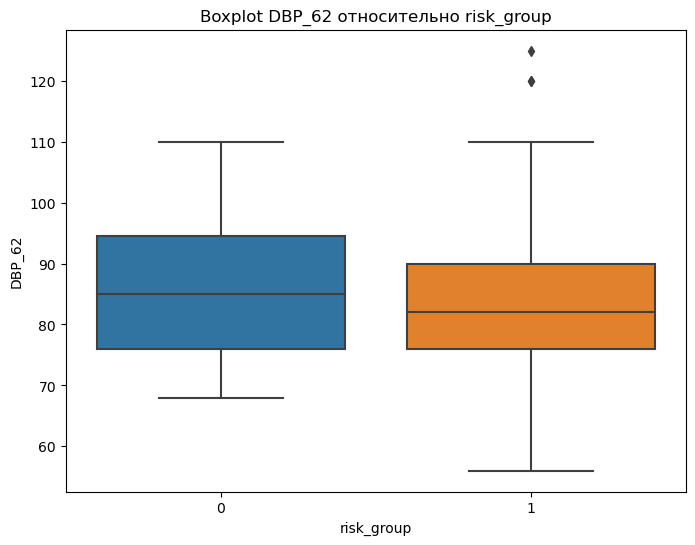

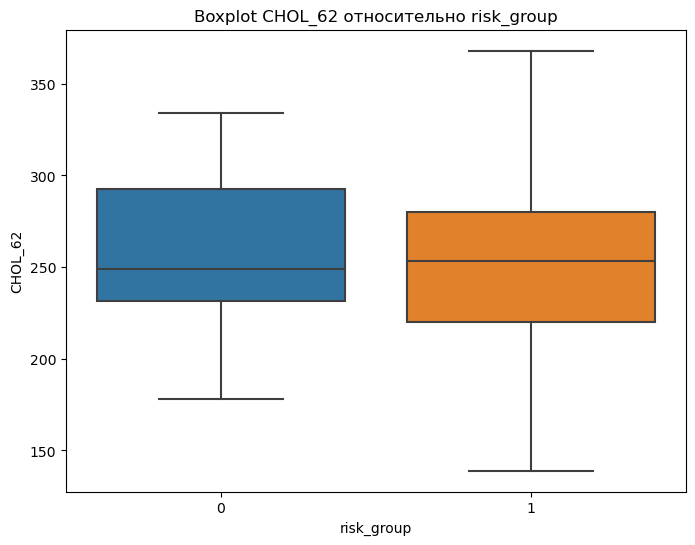

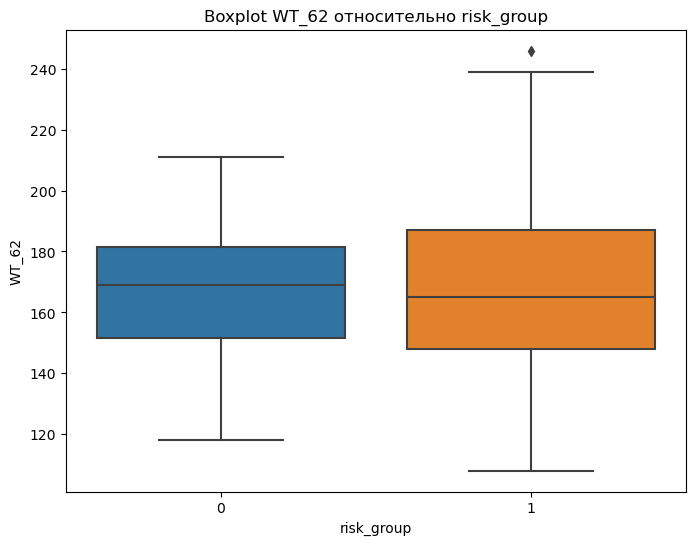

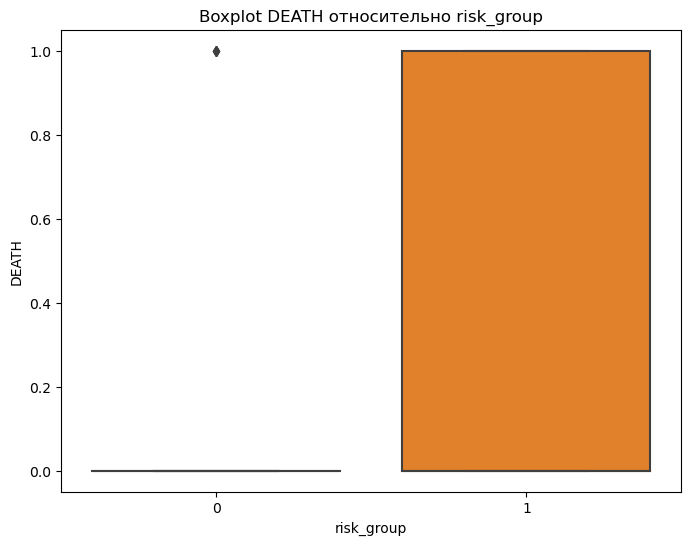

In [113]:
# Построение boxplot для каждой переменной
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='risk_group', y=col, data=df)
    plt.title(f'Boxplot {col} относительно risk_group')
    plt.show()

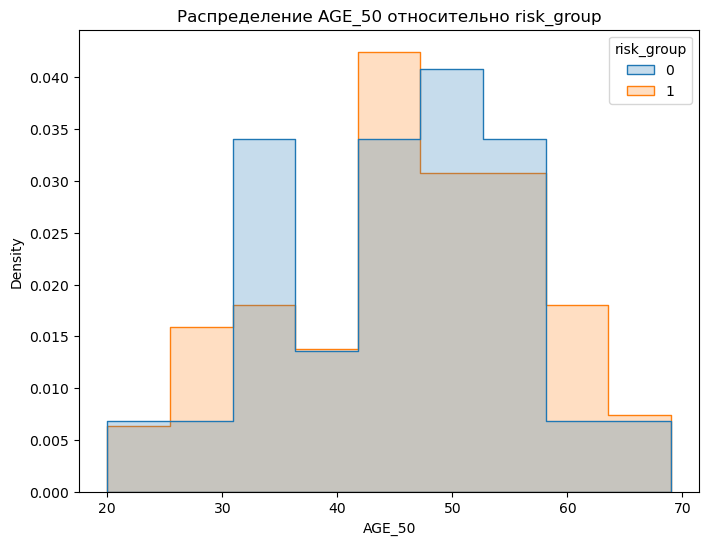

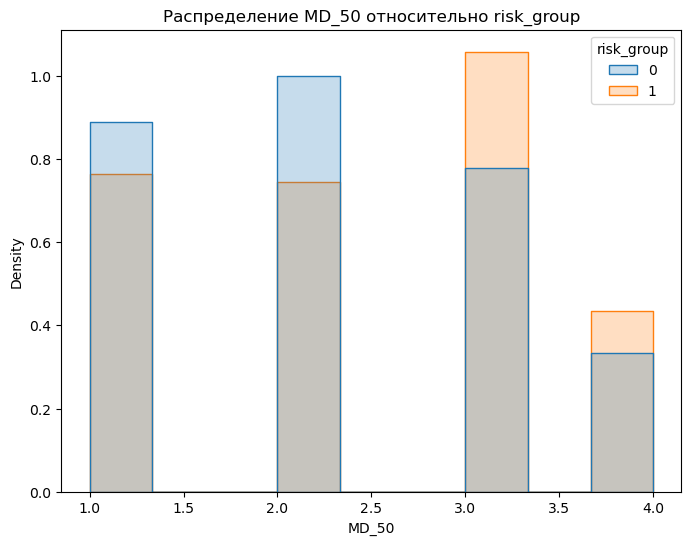

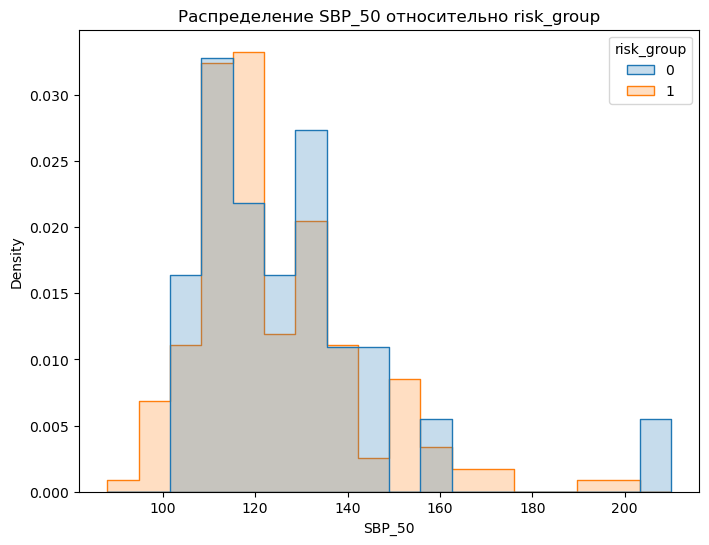

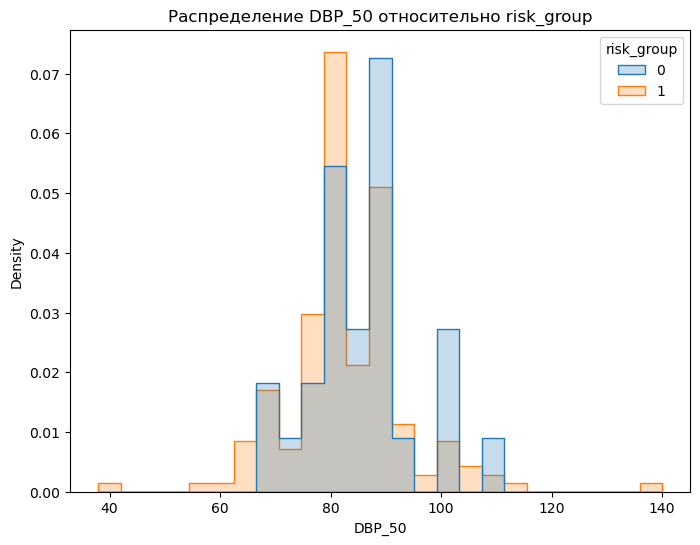

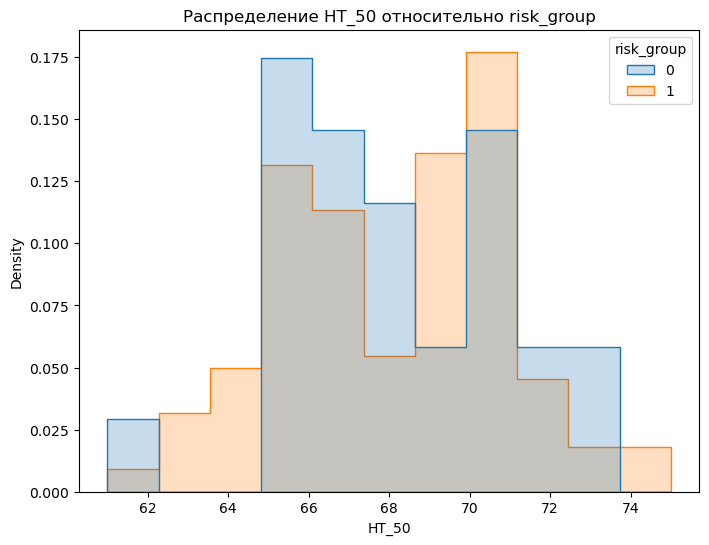

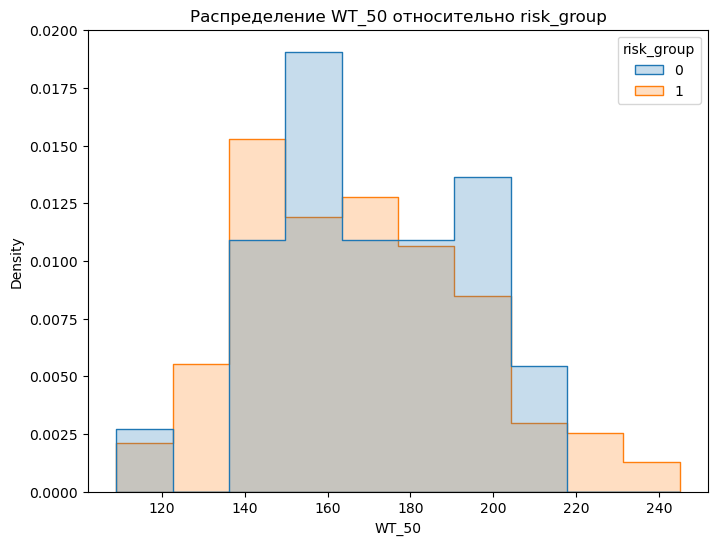

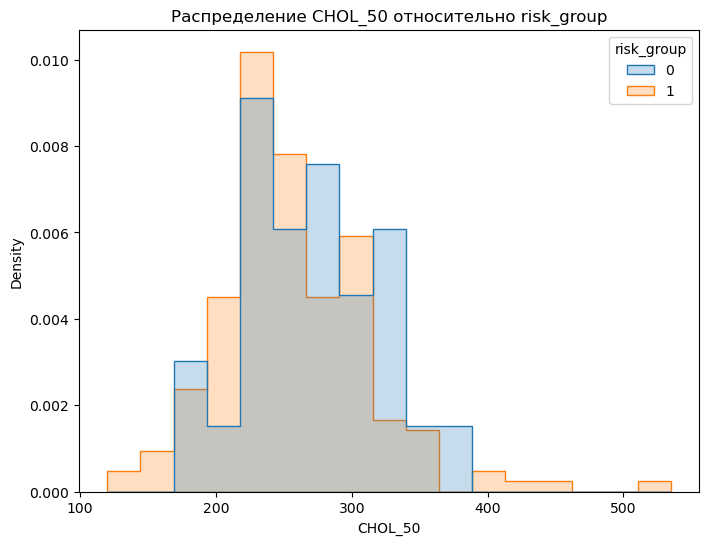

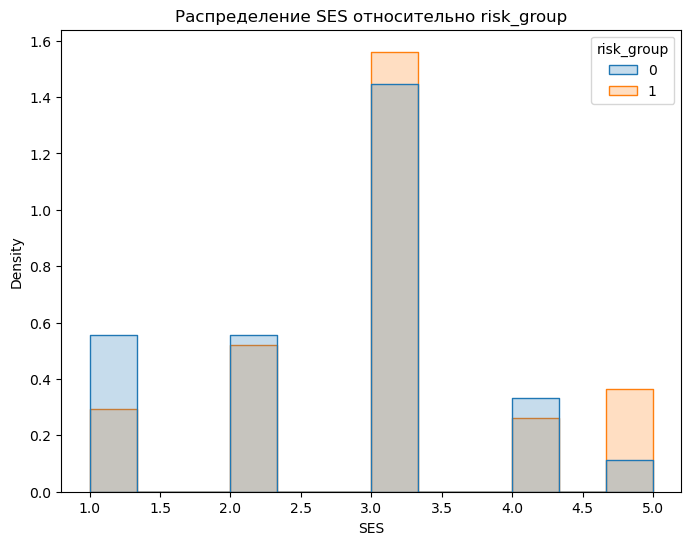

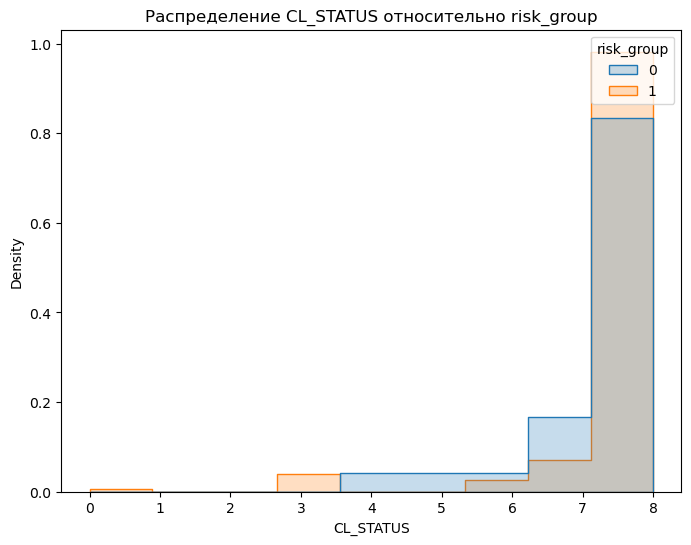

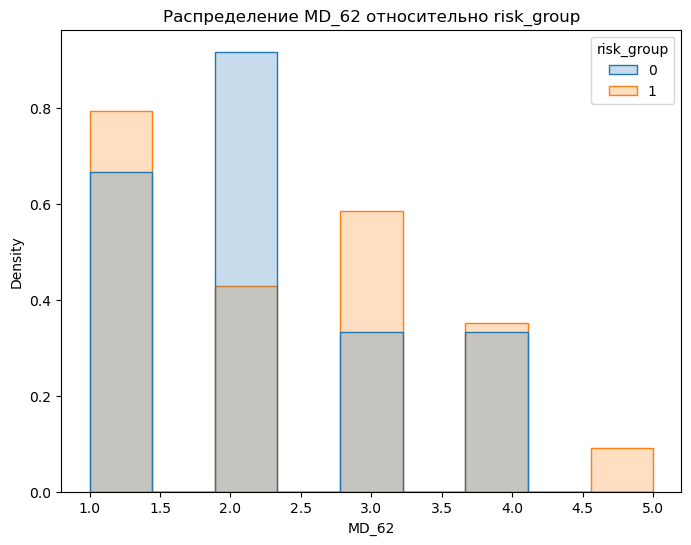

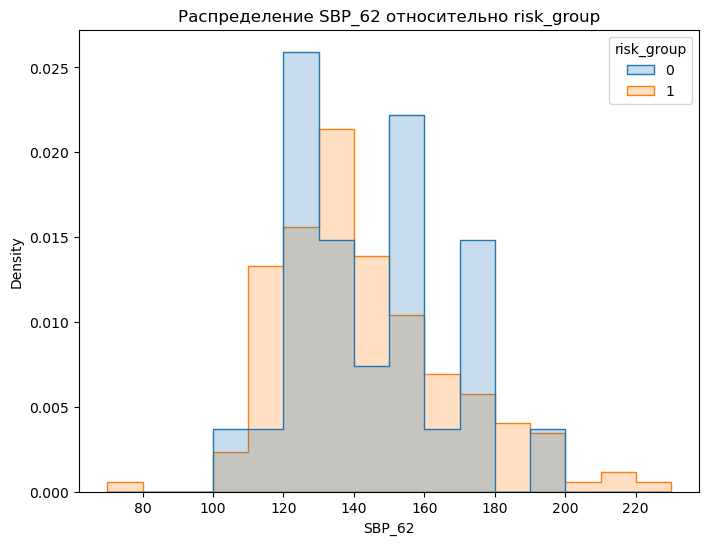

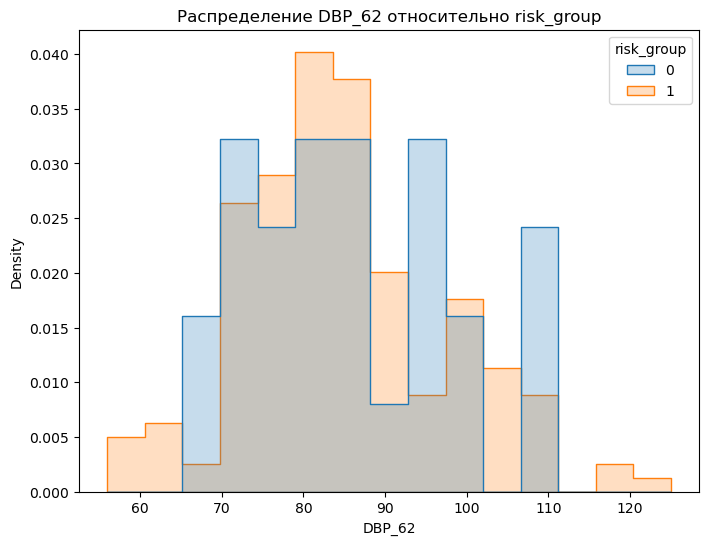

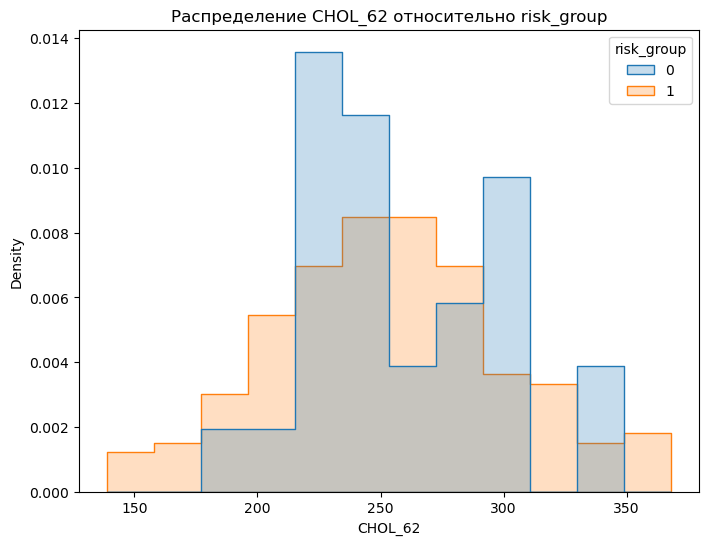

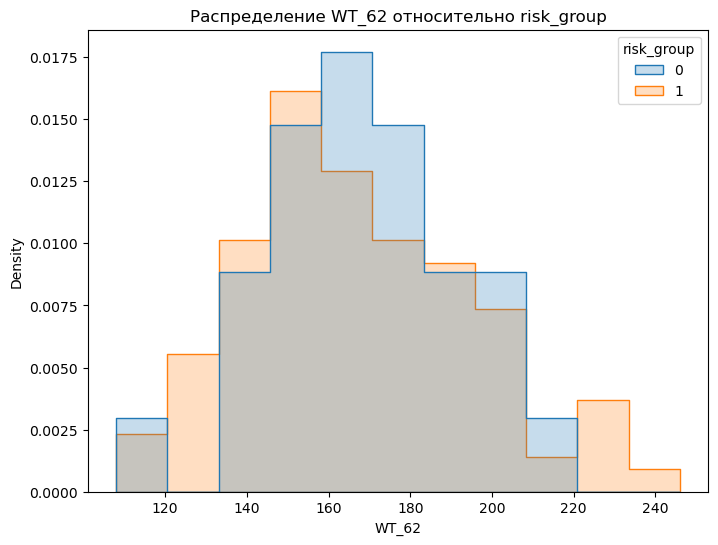

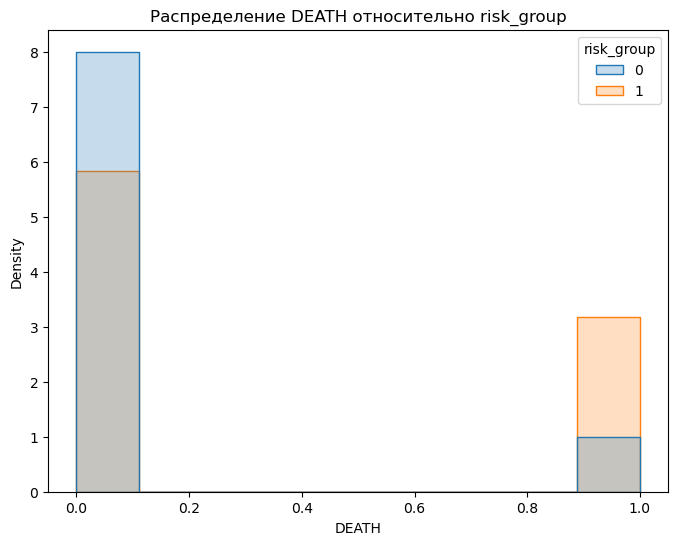

In [114]:
# Построение диаграмм распределения для каждой переменной
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=col, hue='risk_group', element="step", stat="density", common_norm=False)
    plt.title(f'Распределение {col} относительно risk_group')
    plt.show()

⏰ проанализировать график, выделить значимые признаки относительно Y

Чаще всего в группе риска оказываются люди от 40 до 60. Наиболее тяжёлые формы ишемической болезни встречаются среди людей с индексом здоровья 3 и выше. Систолическое и дистолическое давление не оказывает большое влияния на тяжесть диагноза. Диагноз не зависит от роста. Люди с весом от 140 до 200. Чаще всего диагноз ставится людям с уровнем холестерина от 200 до 300, и чаще более тяжелый. Большая часть людей с диагнозом "ишемическая болезнь" относится к среднему социально-экономическому классу и имеют клинический статус 7-8. 

In [115]:
df[['MD_50', 'SES', 'CL_STATUS', 'MD_62', 'IHD_DX', 'DEATH', 'risk_group']] = df[['MD_50', 'SES', 'CL_STATUS', 'MD_62', 'IHD_DX', 'DEATH', 'risk_group']].astype({'MD_50':'category', 'SES':'category', 'CL_STATUS':'category', 'MD_62':'category', 'IHD_DX':'category', 'DEATH':'category', 'risk_group':'category'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   AGE_50      200 non-null    int64   
 1   MD_50       200 non-null    category
 2   SBP_50      200 non-null    int64   
 3   DBP_50      200 non-null    int64   
 4   HT_50       200 non-null    int64   
 5   WT_50       200 non-null    int64   
 6   CHOL_50     200 non-null    int64   
 7   SES         200 non-null    category
 8   CL_STATUS   200 non-null    category
 9   MD_62       200 non-null    category
 10  SBP_62      200 non-null    int64   
 11  DBP_62      200 non-null    int64   
 12  CHOL_62     200 non-null    int64   
 13  WT_62       200 non-null    int64   
 14  IHD_DX      200 non-null    category
 15  DEATH       200 non-null    category
 16  risk_group  200 non-null    category
dtypes: category(7), int64(10)
memory usage: 18.7 KB


In [116]:
# Описательная статистика для числовых переменных, разделенная по целевой переменной
desc_stats_numeric = df.groupby('risk_group', observed=True)[df.select_dtypes(include=['int64']).columns].describe()

# Описательная статистика для категориальных переменных, разделенная по целевой переменной
desc_stats_categorical = df.groupby('risk_group', observed=True)[df.select_dtypes(include=['category']).columns].describe()

### Описание полученных результатов
⏰ ```Необходимо сделать подобное описание для своих переменных```

In [117]:
# Проходим по каждой числовой переменной и выводим статистику отдельно
for col in numeric_cols:
    print(f"Описательная статистика для {col}:\n")
    print(df.groupby('risk_group')[col].describe())
    print("\n" + "="*50 + "\n")


Описательная статистика для AGE_50:

            count       mean        std   min   25%   50%   75%   max
risk_group                                                           
0            27.0  45.555556  10.415718  24.0  36.5  47.0  52.5  64.0
1           173.0  46.144509  10.900551  20.0  39.0  47.0  54.0  69.0


Описательная статистика для MD_50:

            count  unique  top  freq
risk_group                          
0              27       4    2     9
1             173       4    3    61


Описательная статистика для SBP_50:

            count        mean        std    min    25%    50%    75%    max
risk_group                                                                 
0            27.0  127.259259  21.320977  104.0  113.5  125.0  130.0  210.0
1           173.0  124.300578  17.599612   88.0  110.0  120.0  130.0  200.0


Описательная статистика для DBP_50:

            count       mean        std   min   25%   50%   75%    max
risk_group                                  

In [118]:
# print("\nКатегориальные переменные:")
desc_stats_categorical

MD_50                   SES                 CL_STATUS         ...  \
           count unique top freq count unique top freq     count unique  ...   
risk_group                                                               ...   
1            173      4   3   61   173      5   3   90       173      5  ...   
0             27      4   2    9    27      5   3   13        27      5  ...   

           IHD_DX      DEATH                 risk_group                  
              top freq count unique top freq      count unique top freq  
risk_group                                                               
1               0  132   173      2   0  112        173      1   1  173  
0               6   15    27      2   0   24         27      1   0   27  

[2 rows x 28 columns]

#### 1. **AGE_50**:
Средний возраст людей, находящихся в и вне группы риска почти равны (45,6 и 46, 1), однако разброс в группе риска больше примерно на 0,5. При этом минимальные, максимальные значения, а так же медиана, тоже практически не различаются. Это может говорить о том, что тяжесть диагноза не зависит от возраста.
#### 2. **MD_50**:
Среднее значение индекса здоровья людей вне группы риска больше, чем в группе на 0.2. Минимальные, максимальные и и значения триолей полнотью совпадают.
#### 3. **SBP_50 и SBP_62**:
У людей в группе риска в среднем систалическое давление ниже, чем вне группы. Минимальное, максимальное и  медиальные значения также меньше.
#### 4. **DBP_50 и DBP_62**:
Ситуация с дисталическим давлением почти такая же, как и с систолическим за исключением разброса, который больше для людей в группе риска.
#### 5. **HT_50**:
Разницы практически не наблюдается и в значениях роста. Ростне слияет на наличие и тяжесть заболевания.
#### 6. **WT_50 и DBP_62**:
Показатели веса имеют чуть более заметную разницу. В группе риска разброс больше на 3,5 и максимальное значение больше на 34 кг. Это может указывать на связь избытка веса и тяжести диагноза.
#### 7. **CHOL_50 и CHOL_62**:
Среднее значение холестерина у людей вне группы риска больше примерно на 17. Все медиальные показатели тоже больше по сравнениюс шгруппой риска. 
#### 8. **SES**:
Люди в группе риска в среднем относятся к более высокому оциально-экономическому статусу в сравнении с первой группой. Это быть связано с разницей в уровене жизни, который влияет на развитие болезни.
#### 9. **CL_STATUS**:
В группе риска разброс больше, в нее попадают люди с стабильным и критическим сосотоянием здоровья. Вне риска в основном находятся люди со средним уровнем здоровья.

### Вывод:
На основе представленных данных можно сделать выводы о ключевых характеристиках, которые влияют на качество вина. В частности:
- В руппе риска находятся люди с высоким социально-экономическим статусом.
- Более тяжелые виды ишшемической болезни сопровождаются понижением уровня холестирина.
- В группе риска соотношение смертность намного выше.

## 2. Расчет теста Пирсона

### **Описание:**
Вы рассчитаете коэффициенты корреляции Пирсона между Y и каждым из признаков X, чтобы оценить значимость этих корреляций.

### **Шаги:**

1. **Рассчитайте коэффициенты корреляции Пирсона для каждого признака:**

In [74]:
df[df.select_dtypes(include=[np.number]).columns].corr()

,AGE_50,MD_50,SBP_50,DBP_50,HT_50,WT_50,CHOL_50,SES,CL_STATUS,MD_62,SBP_62,DBP_62,CHOL_62,WT_62,IHD_DX,DEATH,risk_group
AGE_50,1.000000,0.022067,0.311815,0.149431,-0.140032,-0.028314,0.069988,-0.141201,-0.034221,0.102846,0.291354,-0.074081,-0.149335,-0.184383,-0.028540,0.397356,0.018660
MD_50,0.022067,1.000000,-0.001199,0.038443,-0.050876,-0.061801,-0.075200,0.042115,0.000882,-0.019306,-0.092437,-0.007341,0.052976,-0.029073,-0.085207,-0.063779,0.068035
SBP_50,0.311815,-0.001199,1.000000,0.747623,-0.162285,0.101327,0.013411,-0.020001,-0.517543,-0.051933,0.485679,0.316481,-0.182626,-0.013504,0.049263,0.116385,-0.055954
DBP_50,0.149431,0.038443,0.747623,1.000000,-0.034516,0.258936,0.049413,-0.011338,-0.427714,-0.062561,0.420695,0.416171,-0.105450,0.145620,0.071156,-0.006174,-0.100994
HT_50,-0.140032,-0.050876,-0.162285,-0.034516,1.000000,0.440524,-0.095610,-0.054799,0.164069,0.015044,-0.038900,0.071399,-0.043998,0.513601,0.019802,-0.043632,-0.003603
WT_50,-0.028314,-0.061801,0.101327,0.258936,0.440524,1.000000,0.053567,0.021217,0.003748,-0.077172,0.080052,0.170940,-0.048215,0.816533,0.117110,-0.064055,-0.035777
CHOL_50,0.069988,-0.075200,0.013411,0.049413,-0.095610,0.053567,1.000000,-0.126293,0.072288,-0.053953,0.003942,-0.035155,0.462148,-0.027414,0.178950,-0.030717,-0.100432
SES,-0.141201,0.042115,-0.020001,-0.011338,-0.054799,0.021217,-0.126293,1.000000,-0.092120,-0.112451,-0.090498,-0.001490,-0.034637,0.070597,-0.074431,-0.065920,0.105691
CL_STATUS,-0.034221,0.000882,-0.517543,-0.427714,0.164069,0.003748,0.072288,-0.092120,1.000000,0.105162,-0.212845,-0.143170,0.150423,0.044730,-0.002368,0.042225,0.046505
MD_62,0.102846,-0.019306,-0.051933,-0.062561,0.015044,-0.077172,-0.053953,-0.112451,0.105162,1.000000,0.019538,0.005683,-0.046520,-0.013978,-0.061039,0.124237,0.055203


2. ⏰ **Интерпретируйте результаты:**


### Интерпретация:
- **Коэффициент корреляции Пирсона** показывает степень линейной связи между двумя переменными.

### Описание корреляций для значимых признаков:



1. **AGE_50 и SBP_50 (0.311815)**:
   - Есть умеренная положительная корреляция между возрастом и систолическим давлением, что указывает на то, что существует связь между возрастом и давлением.

2. **SBP_50 и SBP_62 (0.485679)**:
    - Умеренная, но близкая к высокой положительная корреляция между систалическим давлением в 50 и 62 года, обусловленная тем, что это фактически один и тот же параметр.

3. **SBP_50 и DBP_50 (0.747623)**:
   - Высокая положительная корреляция указывает на прямуя связь между двумя оказателями давления.

4. **SBP_50 и CL_STATUS(-0.517543)**:
   - Отрицательная корреляция между давлением и клиническим статусом, указывает на прямую связь этих параметров.

6. **IHD_DX и risk_group  (-0.898429)**:
   - Сильная отрицательная корреляция между показателем ишеммической болезни и группой риска. Меньшее число показателя позволяет отнести человека к группе риска. Это обусловлено тем, что признак `risk_group` напрямую основан на значении `IHD_DX`.

### Почему мультиколлинеарность это плохо?

Мультиколлинеарность возникает, когда два или более независимых признака сильно коррелируют друг с другом. Это приводит к нескольким проблемам:

1. **Переоценка значимости признаков**:
   - Когда признаки сильно коррелированы, модель может "перепутать" влияние каждого из них на целевую переменную, что приведет к ненадежным коэффициентам. Это затрудняет интерпретацию модели, поскольку сложно понять, какой из признаков действительно важен.

2. **Нестабильность модели**:
   - При наличии мультиколлинеарности небольшие изменения в данных могут привести к большим изменениям в коэффициентах модели. Это делает модель нестабильной и менее устойчивой.

3. **Затруднение выбора значимых признаков**:
   - Модель может затрудняться при выделении важности отдельных признаков, если они сильно связаны друг с другом. Это может усложнить процесс отбора признаков и снизить точность модели.

4. **Увеличение дисперсии коэффициентов**:
   - Мультиколлинеарность увеличивает дисперсию оценок коэффициентов регрессии, что делает их менее надежными. В результате, некоторые признаки могут казаться незначимыми, хотя на самом деле они играют важную роль.

## 3. Немного машинного обучения

- отберем признаки (числовые и категориальные отдельно)
- обработаем числовые и категориальыне
- обучим модель
- узнаем что влияет на Y

In [119]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [127]:
# Выбор категориальных признаков
categorical_features = df.select_dtypes(include=['category']).columns.tolist()
print("Категориальные признаки:", categorical_features)

Категориальные признаки: ['MD_50', 'SES', 'CL_STATUS', 'MD_62', 'IHD_DX', 'DEATH', 'risk_group']


In [128]:
# Создаем копию данных
X_processed = df.copy()

# Применяем One-Hot Encoding
X_processed = pd.get_dummies(X_processed, columns=categorical_features, drop_first=True) # drop_first=True позволяет избежать мультиколлинеарности, удаляя первый уровень категориальной переменной.


In [129]:
X_processed

,AGE_50,SBP_50,DBP_50,HT_50,WT_50,CHOL_50,SBP_62,DBP_62,CHOL_62,WT_62,...,IHD_DX_2,IHD_DX_3,IHD_DX_4,IHD_DX_5,IHD_DX_6,IHD_DX_7,IHD_DX_8,IHD_DX_9,DEATH_1,risk_group_1
0,42,110,65,64,147,291,120,78,271,146,...,1,0,0,0,0,0,0,0,1,1
1,53,130,72,69,167,278,122,68,250,165,...,0,0,0,0,0,0,0,1,1,0
2,53,120,90,70,222,342,132,90,304,223,...,1,0,0,0,0,0,0,0,1,1
3,48,120,80,72,229,239,118,68,209,227,...,0,1,0,0,0,0,0,0,1,1
4,53,118,74,66,134,243,118,56,261,138,...,1,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,50,115,80,66,148,300,115,65,273,152,...,0,0,0,0,0,0,0,0,0,1
196,23,110,70,69,137,120,112,76,198,153,...,0,0,0,0,0,0,0,0,0,1
197,20,130,80,66,150,210,130,85,274,158,...,0,0,0,0,0,0,0,0,0,1
198,46,140,84,66,138,130,148,88,160,157,...,0,0,0,0,0,0,0,0,0,1


In [130]:
# Выбираем числовые признаки
numeric_features = X_processed.select_dtypes(include=['int64']).columns.tolist()

print("Числовые признаки:", numeric_features)

Числовые признаки: ['AGE_50', 'SBP_50', 'DBP_50', 'HT_50', 'WT_50', 'CHOL_50', 'SBP_62', 'DBP_62', 'CHOL_62', 'WT_62']


In [131]:
# Инициализируем scaler
scaler = MinMaxScaler()

# Применяем нормализацию
X_processed[numeric_features] = scaler.fit_transform(X_processed[numeric_features])


In [132]:
X_processed

,AGE_50,SBP_50,DBP_50,HT_50,WT_50,CHOL_50,SBP_62,DBP_62,CHOL_62,WT_62,...,IHD_DX_2,IHD_DX_3,IHD_DX_4,IHD_DX_5,IHD_DX_6,IHD_DX_7,IHD_DX_8,IHD_DX_9,DEATH_1,risk_group_1
0,0.448980,0.180328,0.264706,0.214286,0.279412,0.412048,0.31250,0.318841,0.576419,0.275362,...,1,0,0,0,0,0,0,0,1,1
1,0.673469,0.344262,0.333333,0.571429,0.426471,0.380723,0.32500,0.173913,0.484716,0.413043,...,0,0,0,0,0,0,0,1,1,0
2,0.673469,0.262295,0.509804,0.642857,0.830882,0.534940,0.38750,0.492754,0.720524,0.833333,...,1,0,0,0,0,0,0,0,1,1
3,0.571429,0.262295,0.411765,0.785714,0.882353,0.286747,0.30000,0.173913,0.305677,0.862319,...,0,1,0,0,0,0,0,0,1,1
4,0.673469,0.245902,0.352941,0.357143,0.183824,0.296386,0.30000,0.000000,0.532751,0.217391,...,1,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.612245,0.221311,0.411765,0.357143,0.286765,0.433735,0.28125,0.130435,0.585153,0.318841,...,0,0,0,0,0,0,0,0,0,1
196,0.061224,0.180328,0.313725,0.571429,0.205882,0.000000,0.26250,0.289855,0.257642,0.326087,...,0,0,0,0,0,0,0,0,0,1
197,0.000000,0.344262,0.411765,0.357143,0.301471,0.216867,0.37500,0.420290,0.589520,0.362319,...,0,0,0,0,0,0,0,0,0,1
198,0.530612,0.426230,0.450980,0.357143,0.213235,0.024096,0.48750,0.463768,0.091703,0.355072,...,0,0,0,0,0,0,0,0,0,1


### Шаг 3: Объяснение логистической регрессии


Логистическая регрессия — это статистический метод для анализа набора данных, в котором одна или более независимых переменных определяют исход (зависимую переменную), которая является бинарной (т.е. принимает только два возможных значения, например, 0 и 1). Целью логистической регрессии является нахождение наилучшей модели, описывающей связь между независимыми переменными и вероятностью определенного исхода.

Основные характеристики:

Функция логита (логистическая функция): Используется для моделирования вероятности принадлежности наблюдения к определенному классу.
Выводы о влиянии признаков: Коэффициенты модели показывают, как изменение признака влияет на логарифм отношения шансов.

**Функция для обучения и оценки модели**

In [133]:
def train_and_evaluate(X, Y):
    # Разделение данных на обучающую и тестовую выборки
    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=0.2, random_state=42, stratify=Y)

    # Инициализация модели
    model = LogisticRegression(max_iter=1000)

    # Обучение модели
    model.fit(X_train, Y_train)

    # Предсказания на обучающей выборке
    Y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(Y_train, Y_train_pred)

    # Предсказания на тестовой выборке
    Y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(Y_test, Y_test_pred)

    # Вывод результатов
    print(f"Точность на обучающей выборке: {train_accuracy:.4f}")
    print(f"Точность на тестовой выборке: {test_accuracy:.4f}")

    # Классификационный отчет
    print("\nКлассификационный отчет на тестовой выборке:")
    print(classification_report(Y_test, Y_test_pred))

    return model


In [134]:
# Обучение модели
model = train_and_evaluate(X_processed, Y)

Точность на обучающей выборке: 1.0000
Точность на тестовой выборке: 1.0000

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        35

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



**Пояснение:**

- Точность (Accuracy): Доля правильных предсказаний от общего числа предсказаний.
- Precision (Точность): Доля правильных положительных предсказаний среди всех положительных предсказаний.
- Recall (Полнота): Доля правильно предсказанных положительных случаев среди всех реальных положительных случаев.
- F1-score: Гармоническое среднее между точностью и полнотой.

In [135]:
# Получение коэффициентов модели
coefficients = pd.DataFrame({
    'Feature': X_processed.columns,
    'Coefficient': model.coef_[0]
})

# Сортировка по абсолютному значению коэффициента
coefficients['Abs_Coefficient'] = coefficients['Coefficient'].abs()
coefficients = coefficients.sort_values(by='Abs_Coefficient', ascending=False)

print(coefficients[['Feature', 'Coefficient']])


         Feature  Coefficient
37  risk_group_1     3.624184
32      IHD_DX_6    -1.604913
35      IHD_DX_9    -0.971661
33      IHD_DX_7    -0.795002
28      IHD_DX_2     0.420413
23       MD_62_2    -0.379585
21   CL_STATUS_7    -0.319917
22   CL_STATUS_8     0.311473
24       MD_62_3     0.289991
36       DEATH_1     0.278276
34      IHD_DX_8    -0.252677
4          WT_50    -0.200989
8        CHOL_62    -0.187190
12       MD_50_4     0.172683
16         SES_5     0.166465
3          HT_50    -0.166208
13         SES_2     0.147416
17   CL_STATUS_3     0.146080
5        CHOL_50    -0.140547
26       MD_62_5     0.136959
11       MD_50_3     0.132048
27      IHD_DX_1     0.106200
15         SES_4    -0.096842
2         DBP_50    -0.095629
29      IHD_DX_3     0.093929
19   CL_STATUS_5    -0.090381
30      IHD_DX_4     0.084996
18   CL_STATUS_4    -0.074264
0         AGE_50     0.049865
25       MD_62_4    -0.048924
31      IHD_DX_5     0.047456
1         SBP_50    -0.030023
14        

**Пояснение:**

- Коэффициенты показывают влияние признака на вероятность принадлежности к классу 1 (лучшие вина).
- Положительный коэффициент: Увеличение признака повышает вероятность принадлежности к классу 1.
- Отрицательный коэффициент: Увеличение признака снижает вероятность принадлежности к классу 1.

## 4. Построение модели логистической регрессии для предсказания качества вина

- **Модель логистической регрессии успешно обучена для предсказания лучших вин.**
- **Точность на обучающей и тестовой выборках высока, что указывает на хорошую способность модели обобщать данные.**
- **Анализ коэффициентов показал, какие признаки наиболее влияют на качество вина:**
  - **Содержание алкоголя и сульфатов положительно влияют на качество.**
  - **Плотность и летучая кислотность отрицательно влияют на качество.**
- **Преобразование категориальных признаков и нормализация числовых признаков улучшили качество модели и упростили интерпретацию результатов.**


### 4.1 Кросс-валидация модели

In [136]:
from sklearn.model_selection import cross_val_score

# Кросс-валидация с 5 фолдами
scores = cross_val_score(model, X_processed, Y, cv=5, scoring='accuracy')

print(f"Средняя точность при кросс-валидации: {scores.mean():.4f}")
print(f"Отклонение точности: {scores.std():.4f}")

Средняя точность при кросс-валидации: 1.0000
Отклонение точности: 0.0000


In [137]:
X_train, X_test, Y_train, Y_test = train_test_split(X_processed, Y, test_size=0.2, random_state=42, stratify=Y)

### 4.2 Построение ROC-кривой

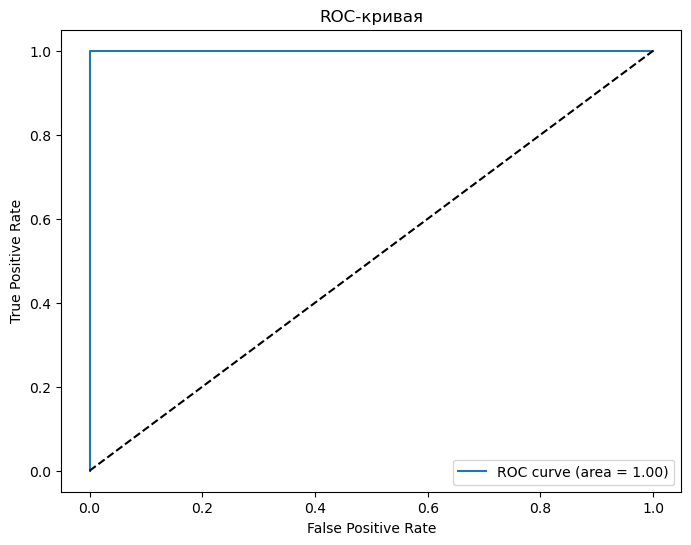

In [138]:
from sklearn.metrics import roc_curve, auc

# Предсказания вероятностей для тестовой выборки
Y_test_prob = model.predict_proba(X_test)[:, 1]

# Расчет ROC-кривой
fpr, tpr, thresholds = roc_curve(Y_test, Y_test_prob)
roc_auc = auc(fpr, tpr)

# Построение графика
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc='lower right')
plt.show()

## ⏰ Доп задание

Изучить различные метрики качества классификационных моделей и понять, в каких ситуациях они наиболее информативны.

**Метрики для исследования:**
- Accuracy (Точность)
- Precision (Точность)
- Recall (Полнота)
- F1 Score
- ROC-AUC
- Log Loss

**Попробовать другие модели и сравнить результат метрик**

**Попробовать другие методы отбора признаков**

**Использовать параметры модели и исследовать влияние на предсказание**

## Заключение

Мы успешно построили модель логистической регрессии для предсказания лучших вин на основе химических характеристик. Преобразование данных и анализ коэффициентов модели позволили нам понять влияние различных признаков на качество вина.


---

# Примечания

- **Логистическая регрессия** является мощным инструментом для бинарной классификации и позволяет интерпретировать результаты через коэффициенты модели.
- **Преобразование категориальных признаков** (One-Hot Encoding) и **нормализация числовых признаков** являются стандартными шагами предобработки данных для многих алгоритмов машинного обучения.
- **Анализ коэффициентов модели** помогает понять, какие признаки наиболее значимы и как они влияют на предсказания.

---

# Дополнительная литература

- **Логистическая регрессия:**
  - [Документация scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
- **Предобработка данных:**
  - [One-Hot Encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)
  - [Min-Max Scaling](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)
- **Метрики качества модели:**
  - [Classification Report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)
  - [ROC-кривая и AUC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html)

---